# IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


C:\Users\sowda\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')

In [3]:
display(insurance_df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# PERFORM EXPLORATORY DATA ANALYSIS - PART 1

<AxesSubplot:>

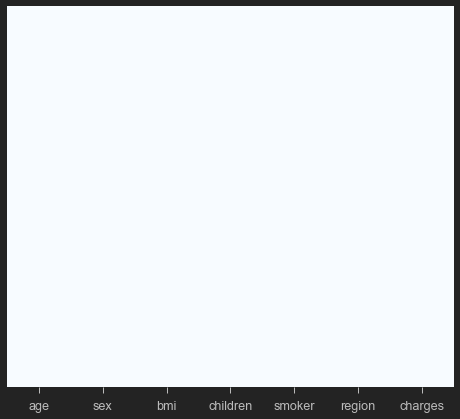

In [5]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
#Below Grpah is empty, since there are no null values

In [6]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by = 'region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [9]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


# PERFORM FEATURE ENGINEERING PART-2

In [10]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
# convert categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'no' else 1)

In [12]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [13]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
# Convert categorical variable to numerical 
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [15]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [18]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [19]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [20]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [21]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)

In [22]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'smoker'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>]],
      dtype=object)

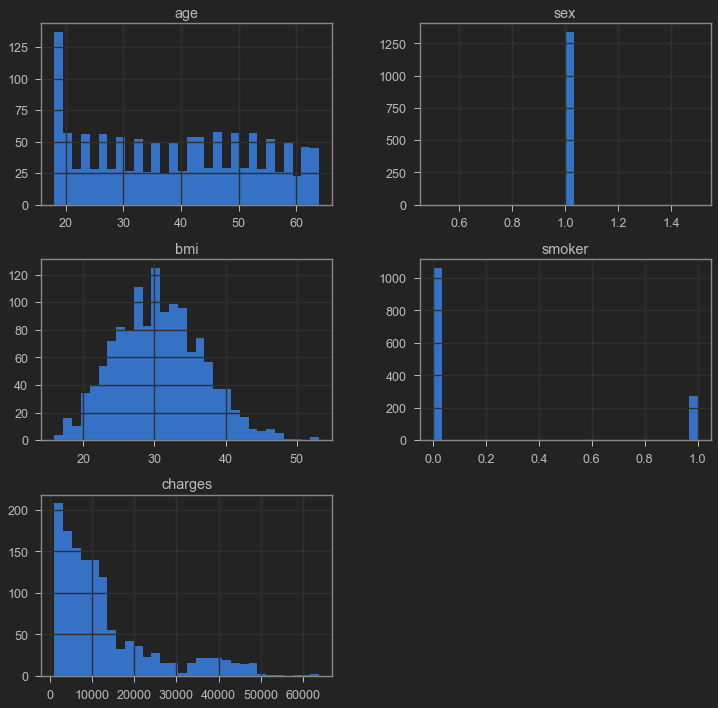

In [23]:
insurance_df[['age','sex','bmi','smoker','charges']].hist(bins=30, figsize=(12,12))

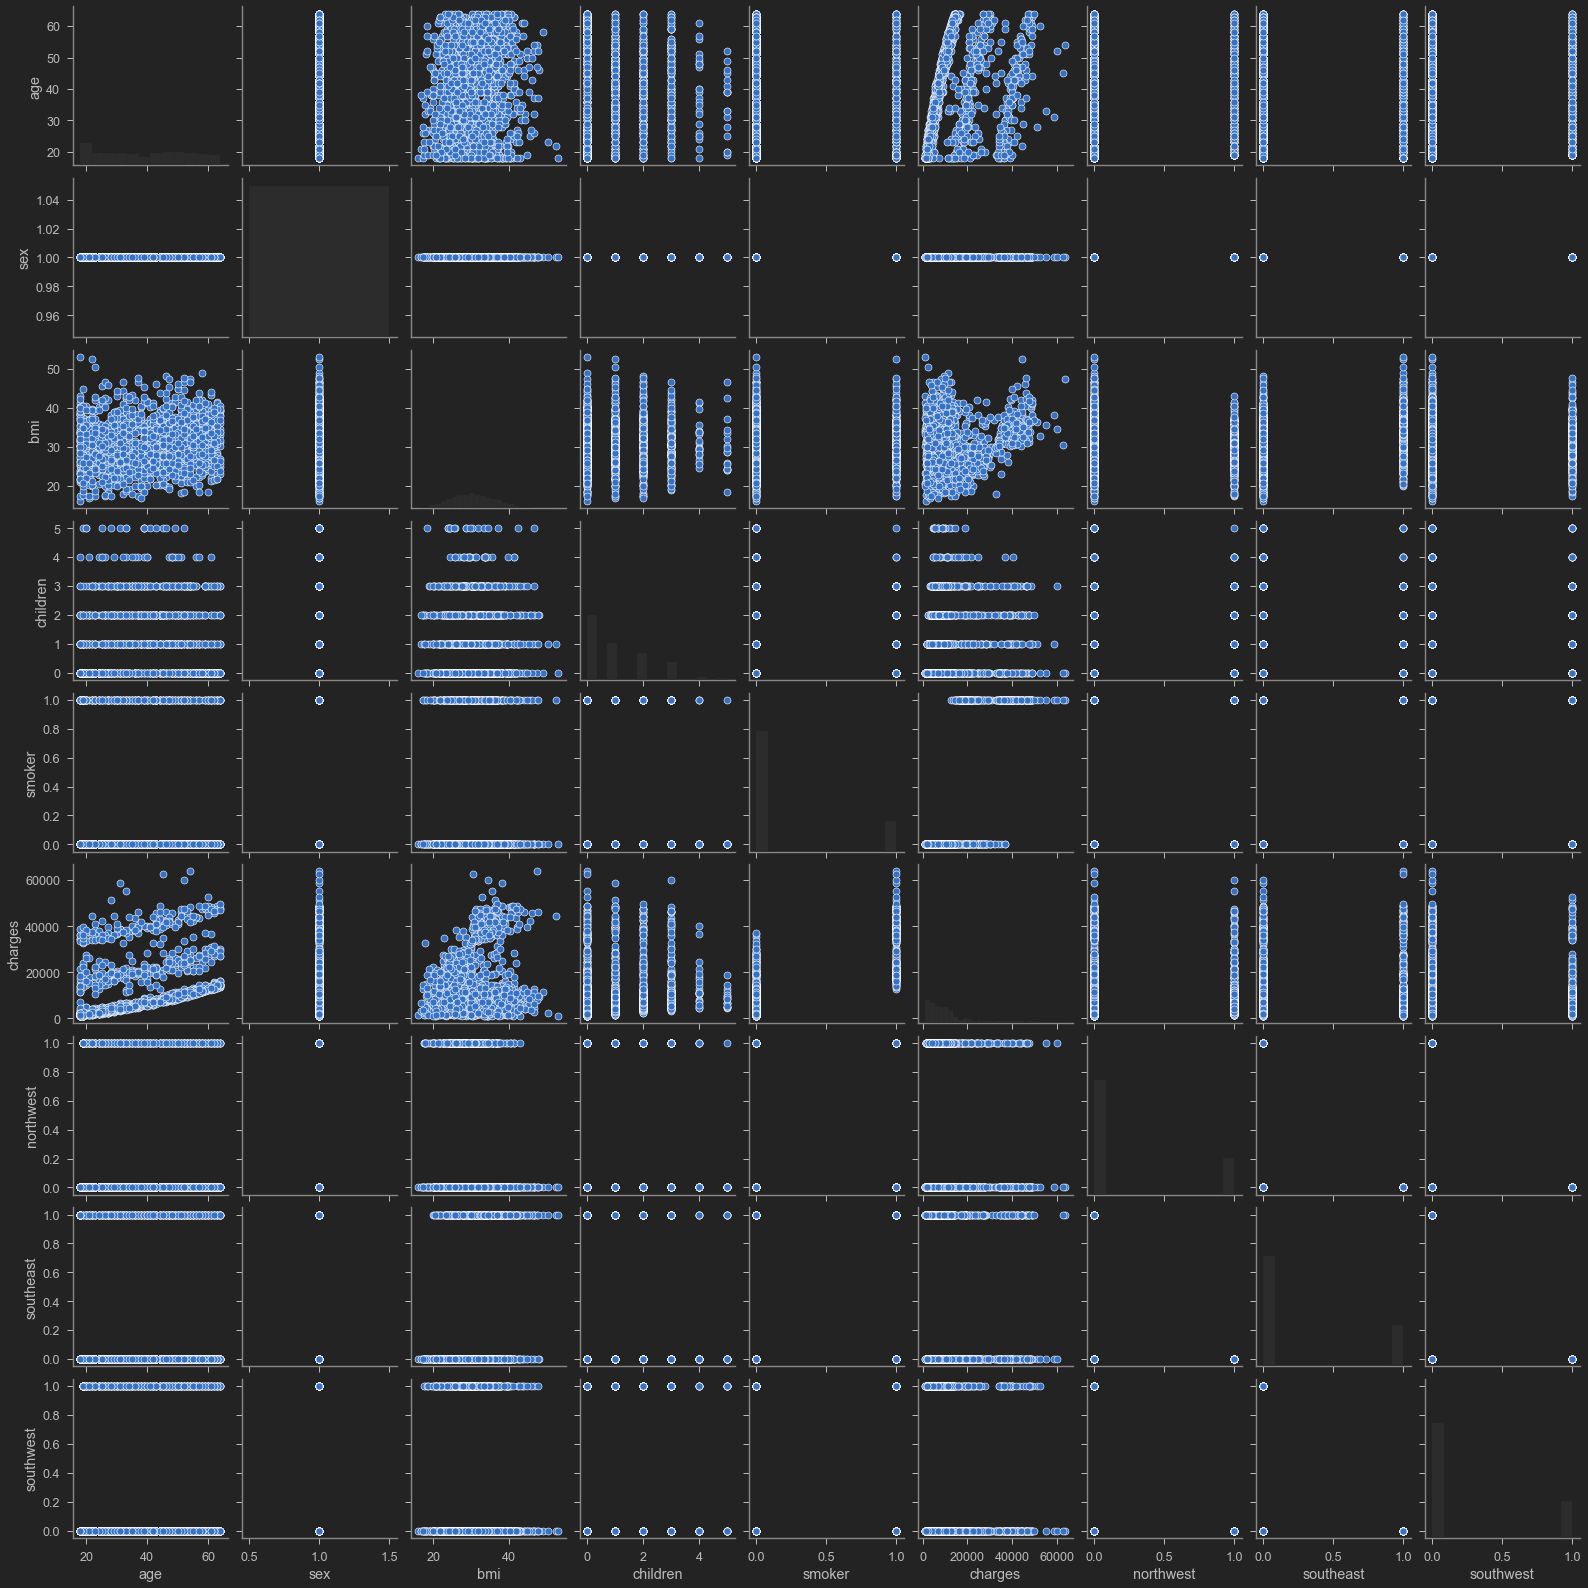

In [24]:
# plot pairplot
sns.pairplot(insurance_df)

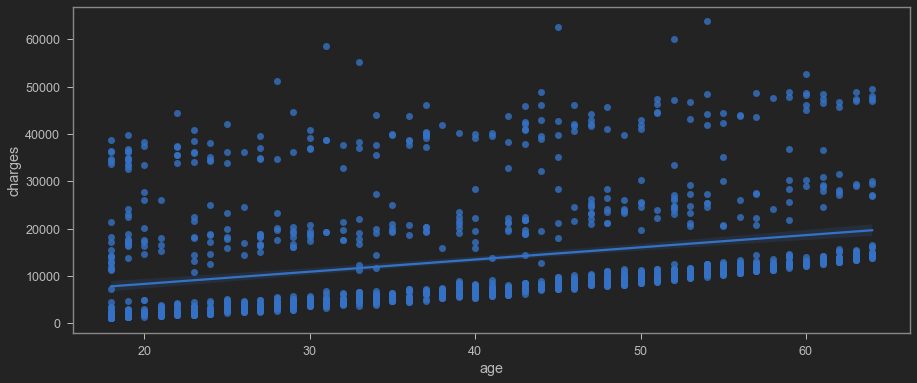

In [25]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

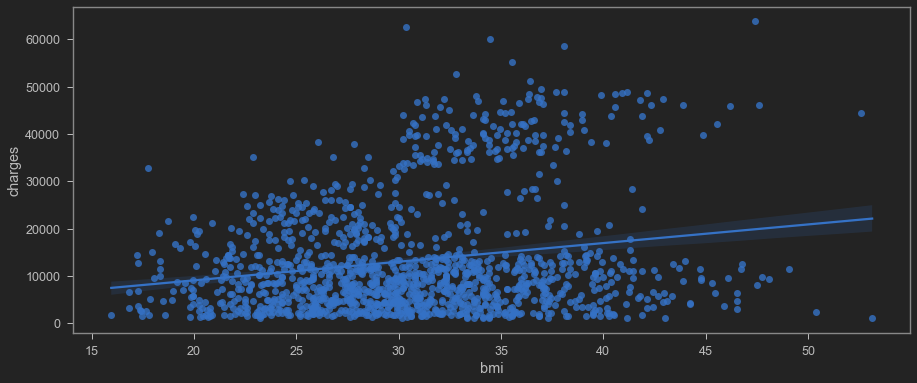

In [26]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

<AxesSubplot:>

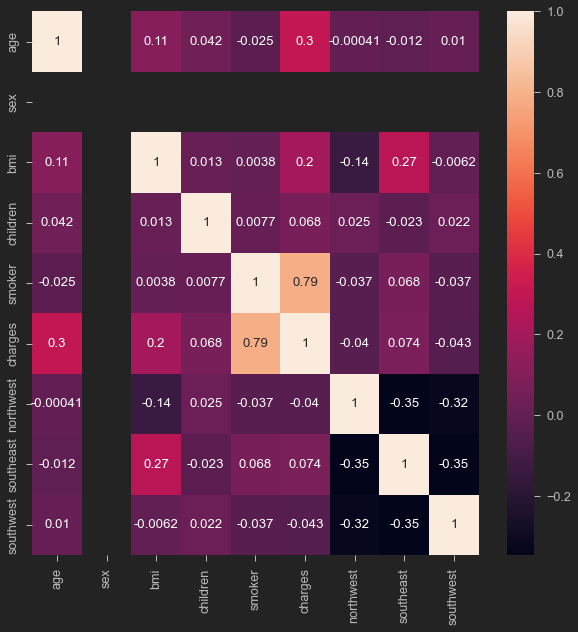

In [27]:
plt.figure(figsize = (10, 10))
sns.heatmap(insurance_df.corr(), annot = True)
# smoker and age have positive correlations with charges

In [28]:
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,NaN,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.109272,NaN,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,NaN,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,NaN,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,NaN,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,NaN,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,NaN,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,NaN,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


# CREATE TRAINING AND TESTING DATASET

In [29]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [30]:
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']

In [31]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,1,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,1,31.920,0,0,0,0,0
1335,18,1,36.850,0,0,0,1,0
1336,21,1,25.800,0,0,0,0,1


In [32]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [33]:
X.shape

(1338, 8)

In [34]:
y.shape

(1338,)

In [35]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [36]:
y = y.reshape(-1,1)

In [37]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  1.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  1.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  1.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  1.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [38]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

Train size:  1070 Test size:  268


C:\Users\sowda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


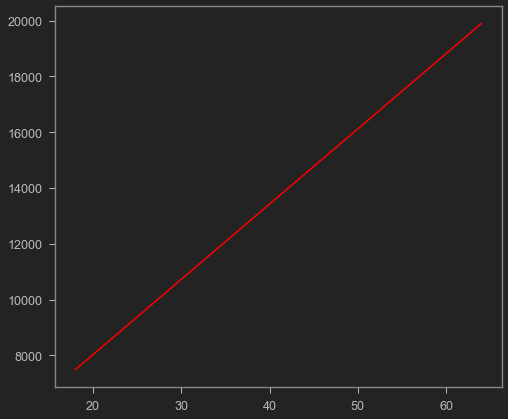

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

train_set, test_set = train_test_split(insurance_df,test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

X1 = train_set[['age']]
y1 = train_set['charges']
X_test1 = test_set[['age']]
y_test1 = test_set['charges']

lr_model = LinearRegression()
lr_model.fit(X1,y1)

y_pred = lr_model.predict(X1)

import matplotlib.pyplot as plt

age = insurance_df['age']
charges = insurance_df['charges']

min_age = age.min()
max_age = age.max()
points = 200
step_by = (max_age - min_age)/(points-1)

x_values = [min_age + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

plt.plot(x_values, y_values, c='red')

Train size:  1070 Test size:  268


C:\Users\sowda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


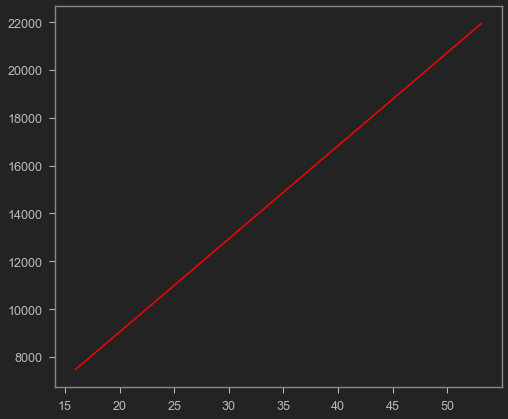

In [41]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance_df,test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

X2 = train_set[['bmi']]
y2 = train_set['charges']
X_test2 = test_set[['bmi']]
y_test2 = test_set['charges']

lr_model = LinearRegression()
lr_model.fit(X2,y2)

y_pred = lr_model.predict(X2)

import matplotlib.pyplot as plt

bmi = insurance_df['bmi']
charges = insurance_df['charges']

min_bmi = bmi.min()
max_bmi = bmi.max()
points = 200
step_by = (max_bmi - min_bmi)/(points-1)

x_values = [min_bmi + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

plt.plot(x_values, y_values, c='red')

Train size:  1070 Test size:  268


C:\Users\sowda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


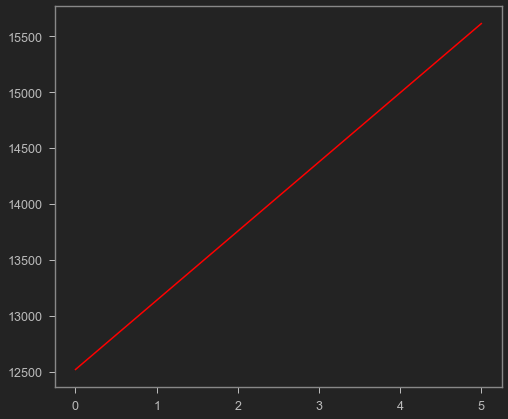

In [42]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance_df,test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

X1 = train_set[['children']]
y1 = train_set['charges']
X_test1 = test_set[['children']]
y_test1 = test_set['charges']

lr_model = LinearRegression()
lr_model.fit(X1,y1)

y_pred = lr_model.predict(X1)

import matplotlib.pyplot as plt

children = insurance_df['children']
charges = insurance_df['charges']

min_children = children.min()
max_children = children.max()
points = 200
step_by = (max_children - min_children)/(points-1)

x_values = [min_children + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

plt.plot(x_values, y_values, c='red')

Train size:  1070 Test size:  268


C:\Users\sowda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


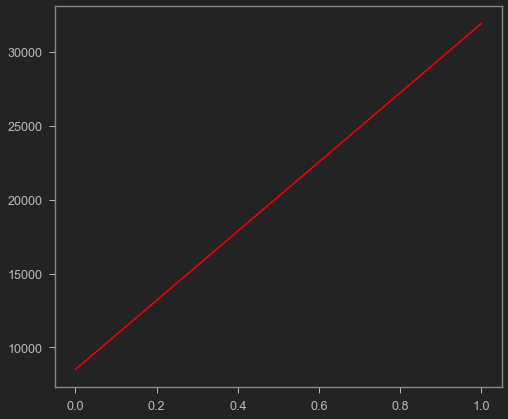

In [43]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance_df,test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

X1 = train_set[['smoker']]
y1 = train_set['charges']
X_test1 = test_set[['smoker']]
y_test1 = test_set['charges']

lr_model = LinearRegression()
lr_model.fit(X1,y1)

y_pred = lr_model.predict(X1)

import matplotlib.pyplot as plt

smoker = insurance_df['smoker']
charges = insurance_df['charges']

min_smoker = smoker.min()
max_smoker = smoker.max()
points = 200
step_by = (max_smoker - min_smoker)/(points-1)

x_values = [min_smoker + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

plt.plot(x_values, y_values, c='red')

In [44]:
# using linear regression model on the above trained model with 8 columns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn = regresssion_model_sklearn.fit(X_train,y_train)

In [45]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.6957413907119392

In [46]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [47]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
#Inverse transofmr here converts the charges back to USD and gives the result in USD

In [48]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6532.417 
MSE = 42672480.0 
MAE = 4545.3667 
R2 = 0.6957414042936747 
Adjusted R2 = 0.6863434553915488


# TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [51]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7

In [52]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs =100, batch_size=20, validation_split=0.2)

Epoch 1/100
43/43 [==============================] - 4s 20ms/step - loss: 0.3653 - val_loss: 0.1880
Epoch 2/100
43/43 [==============================] - 0s 9ms/step - loss: 0.1604 - val_loss: 0.1900
Epoch 3/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1567 - val_loss: 0.1637
Epoch 4/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1397 - val_loss: 0.1703
Epoch 5/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1336 - val_loss: 0.1610
Epoch 6/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1307 - val_loss: 0.1532
Epoch 7/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1359 - val_loss: 0.1585
Epoch 8/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1408 - val_loss: 0.1897
Epoch 9/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1390 - val_loss: 0.1663
Epoch 10/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1269 - val_loss: 0.1718
Epoch 11

In [53]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 5ms/step - loss: 0.2969
Accuracy : 0.7031135261058807


In [54]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

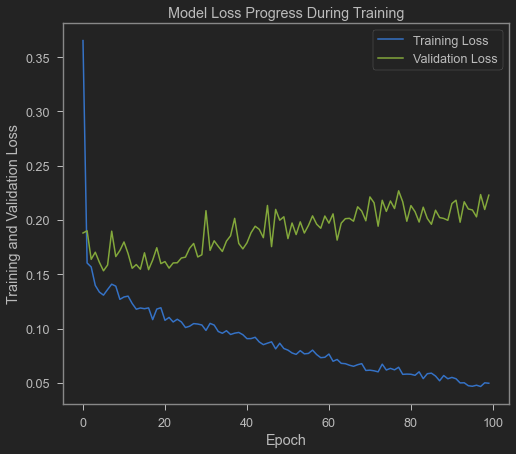

In [55]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
#The model is lighthly overfitting the data

9/9 [==============================] - 0s 4ms/step


Text(0, 0.5, 'True Values')

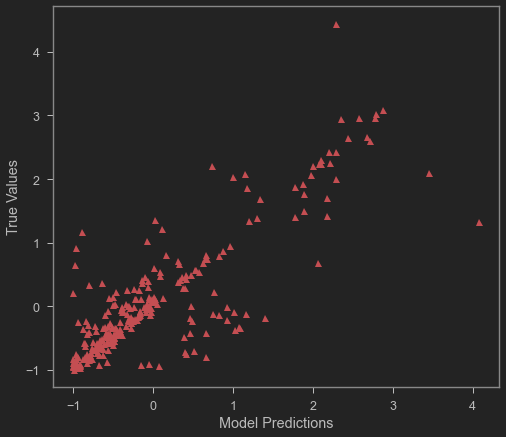

In [56]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [57]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

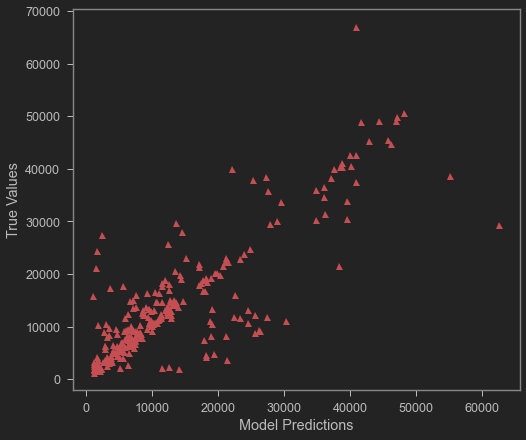

In [58]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [59]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6595.951 
MSE = 43506570.0 
MAE = 3895.475 
R2 = 0.6897942899604639 
Adjusted R2 = 0.6802126464071192


**Dropout is a regularization technique that is used to improve the network generalization ability. Experimenting adding dropout layers to enahnce network generalization ability**
**Retrain the network and assess its performance**

In [60]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                450       
                                                                 
 activation_4 (Activation)   (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 activation_5 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 activation_6 (Activation)   (None, 150)              

# Random Forest Algorithm Prediction

In [61]:
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
insurance_df.dtypes

age            int64
sex            int64
bmi          float64
children       int64
smoker         int64
charges      float64
northwest      uint8
southeast      uint8
southwest      uint8
dtype: object

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
random_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
random_df

,Actual,Predicted
578,9724.53000,10586.629852
610,8547.69130,9330.889711
569,45702.02235,45573.079664
1034,12950.07120,13295.153275
198,9644.25250,9662.575568
...,...,...
1261,3277.16100,6014.512896
494,17942.10600,17477.005172
97,10226.28420,14217.000326
418,14418.28040,19831.647043


In [66]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2774.6098177980066
Mean Squared Error: 22319033.776919592
Root Mean Squared Error: 4724.302464588777


In [67]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2774.61 degrees.
Accuracy: 62.51 %.


C:\Users\sowda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sowda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


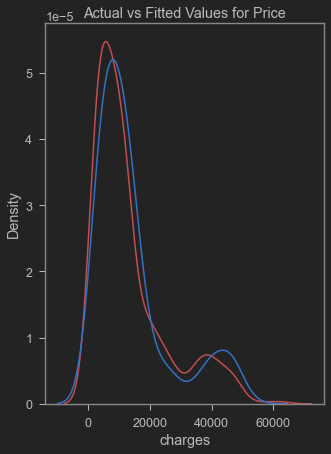

In [68]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

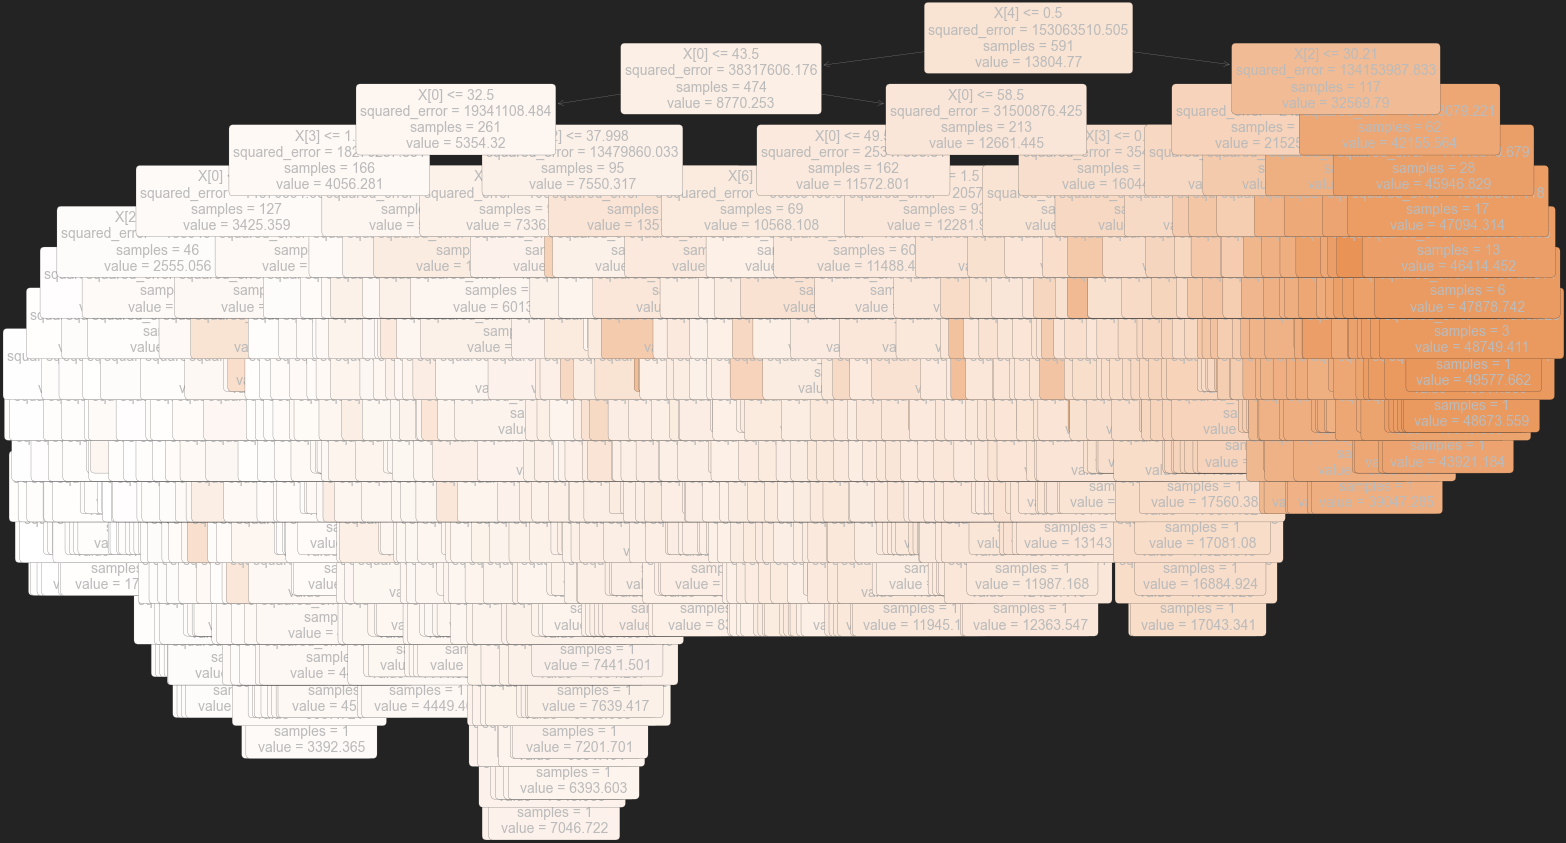

In [69]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True,rounded=True, fontsize=14);